<a href="https://colab.research.google.com/github/Yavanica123/22311A05B5/blob/main/Scraping_and_storing_data_to_CSV_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests beautifulsoup4 pandas

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Lists to store the scraped data
titles = []
prices = []

# Loop through the first 3 pages of the site
for page in range(1, 4):  # You can change range(1, 51) for all pages
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    books = soup.find_all('article', class_='product_pod')

    for book in books:
        title = book.h3.a['title']
        price = book.find('p', class_='price_color').text
        titles.append(title)
        prices.append(price)

# Create a DataFrame
df = pd.DataFrame({
    'Title': titles,
    'Price': prices
})

# Clean the price column (remove £ and convert to float)
df['Price'] = df['Price'].str.replace('£', '').astype(float)

# Show first 5 rows
df.head()


,Title,Price
0,A Light in the Attic,51.77
1,Tipping the Velvet,53.74
2,Soumission,50.10
3,Sharp Objects,47.82
4,Sapiens: A Brief History of Humankind,54.23


In [ ]:
df.to_csv('books_data.csv', index=False)
print("Data saved to books_data.csv")

Data saved to books_data.csv


In [ ]:
from google.colab import files
files.download('books_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# NOW VISUALIZATION

In [ ]:
!pip install seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


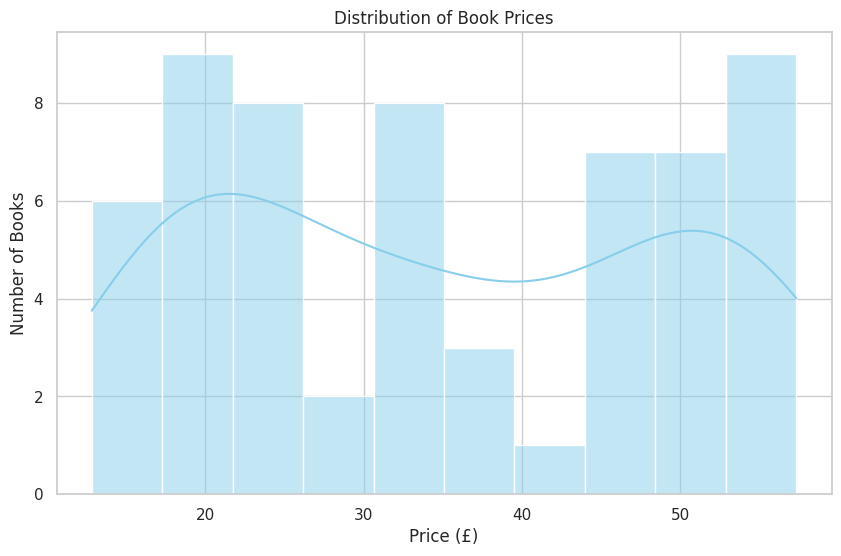

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Book Prices')
plt.xlabel('Price (£)')
plt.ylabel('Number of Books')
plt.show()

<ipython-input-9-9330f254ff35>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='Title', data=top_books, palette='magma')


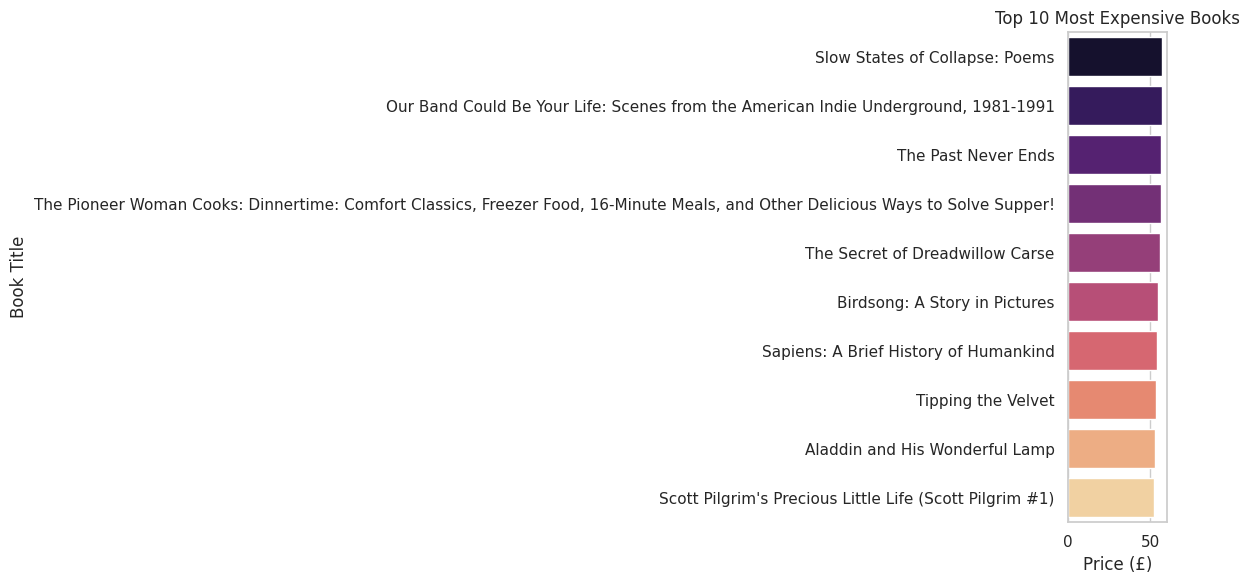

In [ ]:
op_books = df.sort_values(by='Price', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Price', y='Title', data=top_books, palette='magma')
plt.title('Top 10 Most Expensive Books')
plt.xlabel('Price (£)')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()

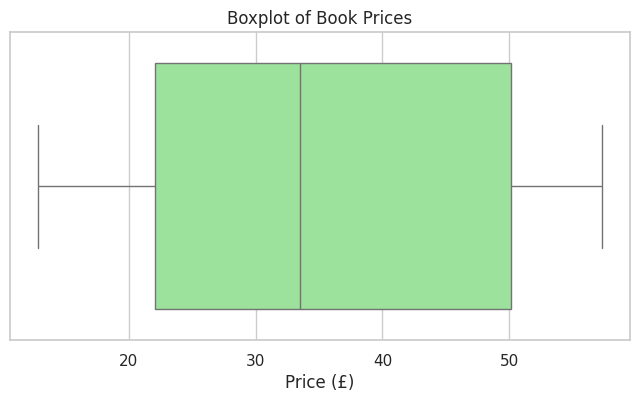

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Price'], color='lightgreen')
plt.title('Boxplot of Book Prices')
plt.xlabel('Price (£)')
plt.show()

In [ ]:
def price_category(price):
    if price < 20:
        return 'Low'
    elif 20 <= price < 35:
        return 'Medium'
    else:
        return 'High'

df['PriceCategory'] = df['Price'].apply(price_category)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Features (book titles), Labels (PriceCategory)
X = df['Title']
y = df['PriceCategory']

# Convert text titles to numerical vectors
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

# Encode labels
label_enc = LabelEncoder()
y_enc = label_enc.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_enc, test_size=0.2, random_state=42)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5
Precision: 0.2727272727272727
Recall: 0.5
F1 Score: 0.35294117647058826
Confusion Matrix:
 [[6 0 0]
 [2 0 1]
 [3 0 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
